<a href="https://colab.research.google.com/github/OMKARTT/PythonPracticeCode/blob/main/Copy_of_Regression_Working_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
# Importing required base libraries
import pandas as pd
import numpy as np

In [66]:
# Loading the dataset by file uploads
#hospital_df = pd.read_csv('HospitalCosts.csv')

# Loading the dataset through GitHub
url = 'https://raw.githubusercontent.com/ShishirIITM/Training_Prog_Dataset/main/GAVS_Datasets/HospitalCosts.csv'
hospital_df = pd.read_csv(url)

In [67]:
# View size of the dataset
np.shape(hospital_df)

(500, 6)

In [68]:
# View the first five rows of the dataset
hospital_df.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


In [69]:
# Checking for missing values in the dataset
# Display rows with missing data
hospital_df[hospital_df.isnull().any(axis=1)]

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
276,0,1,2,NaN,1156,640


In [70]:
# Dropping the one row with missing value in RACE column
hospital_df = hospital_df.dropna()
hospital_df.reset_index(inplace=True)
print(hospital_df.isnull().sum())

index     0
AGE       0
FEMALE    0
LOS       0
RACE      0
TOTCHG    0
APRDRG    0
dtype: int64


# Regression

## Simple linear regression

Let us see the relationship between **age** and the **hospital stay cost** with the help of a scatter plot.

In [71]:
import matplotlib.pyplot as plt

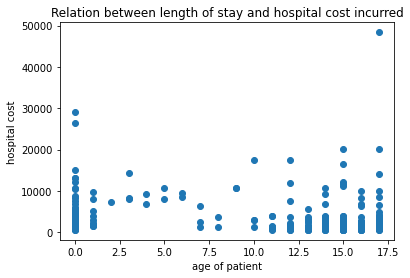

In [72]:
plt.scatter(hospital_df.AGE, hospital_df.TOTCHG)
plt.xlabel('age of patient')
plt.ylabel('hospital cost')
plt.title('Relation between length of stay and hospital cost incurred')
plt.show()

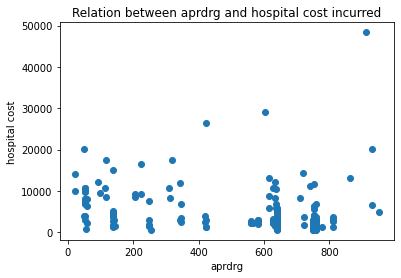

In [73]:
plt.scatter(hospital_df.APRDRG,hospital_df.TOTCHG)
plt.xlabel('aprdrg')
plt.ylabel('hospital cost')
plt.title('Relation between aprdrg and hospital cost incurred')
plt.show()

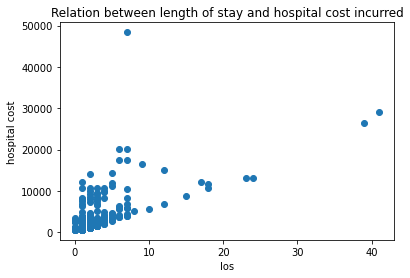

In [74]:
plt.scatter(hospital_df.LOS,hospital_df.TOTCHG)
plt.xlabel('los')
plt.ylabel('hospital cost')
plt.title('Relation between length of stay and hospital cost incurred')
plt.show()

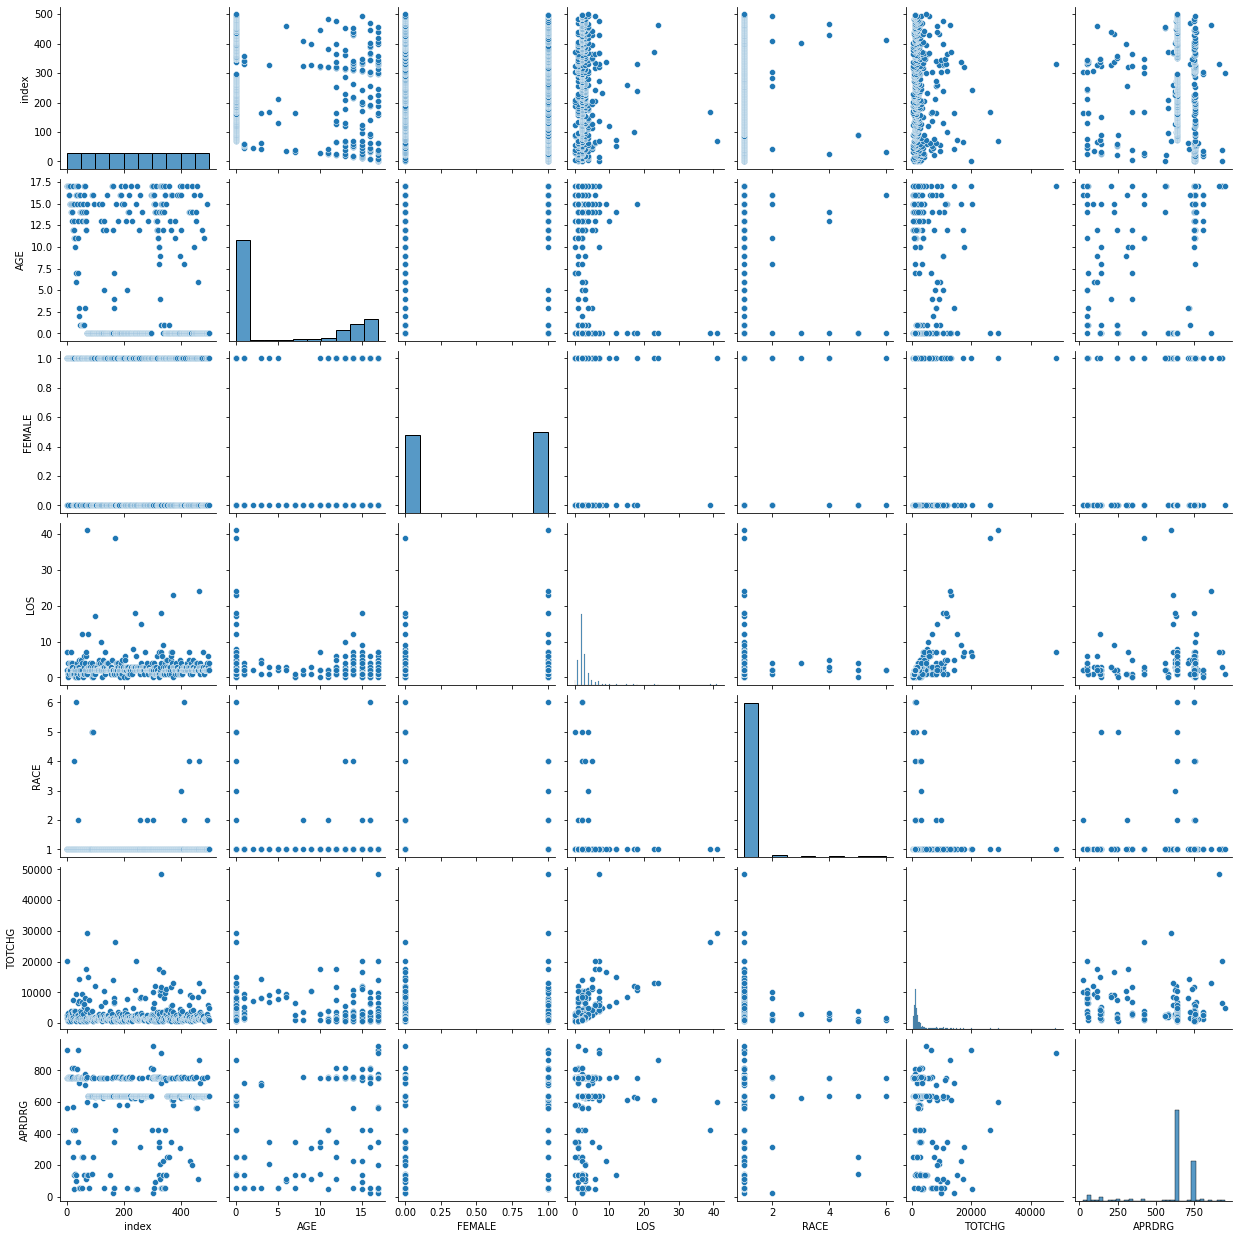

In [75]:
import seaborn as sns

sns.pairplot(hospital_df)

Build a linear regression model with age as independent variable and Hospital cost as dependent variable  


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [77]:
X =hospital_df[['AGE']] 
y = hospital_df[['TOTCHG']]
print(X)
print(y)

     AGE
0     17
1     17
2     17
3     17
4     17
..   ...
494    0
495    0
496    0
497    0
498    0

[499 rows x 1 columns]
     TOTCHG
0      2660
1      1689
2     20060
3       736
4      1194
..      ...
494    5881
495    1171
496    1171
497    1086
498    4931

[499 rows x 1 columns]


In [78]:
# In order to train a model, we take just 80% of the entire data available. 
# The other 20% will later be used for testing the built model.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=100)


In [79]:
X_train

,AGE
205,17
445,0
321,10
368,16
55,1
...,...
343,16
359,0
323,8
280,0


In [80]:
y_train

,TOTCHG
205,3315
445,1120
321,17524
368,2238
55,9606
...,...
343,1422
359,1097
323,3588
280,2724


In [81]:
X_test

,AGE
69,13
29,10
470,0
494,0
54,13
...,...
282,0
152,0
154,0
56,1


In [82]:
y_test

,TOTCHG
69,628
29,2860
470,1411
494,5881
54,1211
...,...
282,1211
152,1269
154,1396
56,1411


In [83]:
## Use the training set and build a simple linear regression model.

lm1 = LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression()

In [84]:
# Print coefficients
lm1.coef_

array([[61.55113579]])

In [85]:
# Print intercept
lm1.intercept_

array([2437.59945626])

Using the built model, predict the hospital stay cost for the test set of AGE. 

In [86]:
## Use the fitted model to predict hospital stay cost on test set
y_pred = lm1.predict(X_test)

Evaluate the model using the R^2 score.

In [87]:
# For test data
lm1.score(X_test,y_test)

0.018868458569048507

In [88]:
# For train data
lm1.score(X_train,y_train)

0.01544044941281042

Calculate the mean squared error

In [89]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test,y_pred)
rmse1 = np.sqrt(mse1)
print('Mean squared error for the first model is: ', mse1)
print('Root mean squared error for the first model is: ', rmse1)

Mean squared error for the first model is:  26588172.74266924
Root mean squared error for the first model is:  5156.3720523900565


OLS using statsmodels library

In [90]:
import statsmodels.api as sm

In [91]:
x_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,x_train)
result1 = model1.fit()

# Print summary of model 
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTCHG   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     6.226
Date:                Fri, 15 Jul 2022   Prob (F-statistic):             0.0130
Time:                        10:21:29   Log-Likelihood:                -3816.8
No. Observations:                 399   AIC:                             7638.
Df Residuals:                     397   BIC:                             7646.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2437.5995    217.581     11.203      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Plotting a regression line

In [92]:
import seaborn as sb

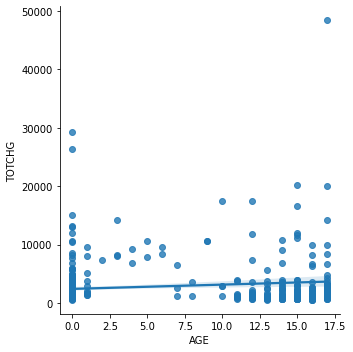

In [93]:
# AGE vs TOTCHG
df = hospital_df[['AGE','TOTCHG']]
  
# use lmplot
sb.lmplot(x='AGE',y='TOTCHG',data=df)

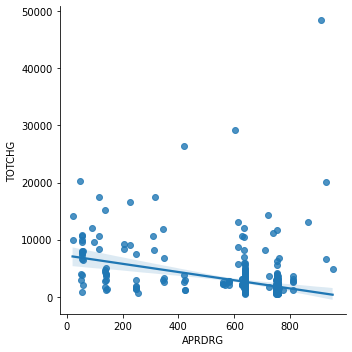

In [94]:
# APRDRG vs TOTCHG
df = hospital_df[['APRDRG','TOTCHG']]

# use lmplot
sb.lmplot(x='APRDRG',y='TOTCHG',data=df)

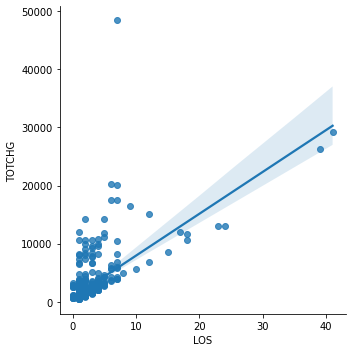

In [95]:
# LOS vs TOTCHG
df = hospital_df[['LOS','TOTCHG']]

# use lmplot
sb.lmplot(x='LOS',y='TOTCHG',data=df)

## Multiple Linear Regression 

Consider age, length of stay and diagnostic category as independent variables and hospital stay cost as dependent variables, and build a multiple linear regression model.

In [96]:
X = hospital_df[['AGE','LOS','APRDRG']]
y = hospital_df[['TOTCHG']]
print(X)
print(y)

     AGE  LOS  APRDRG
0     17    2     560
1     17    2     753
2     17    7     930
3     17    1     758
4     17    1     754
..   ...  ...     ...
494    0    6     636
495    0    2     640
496    0    2     640
497    0    2     640
498    0    4     640

[499 rows x 3 columns]
     TOTCHG
0      2660
1      1689
2     20060
3       736
4      1194
..      ...
494    5881
495    1171
496    1171
497    1086
498    4931

[499 rows x 1 columns]


In [97]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 100)

In [98]:
## Building a linear regression model.

lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

In [99]:
# Print coefficients and intercept
print(lm2.coef_)
print(lm2.intercept_)

[[110.46839974 724.17859289  -9.13305086]]
[5754.35869291]


Using the model built, make predictions on the test dataset.

In [100]:
y_pred = lm2.predict(X_test)

Calculate R^2 value

In [101]:
# For test data
lm2.score(X_test,y_test)

0.21092319431508555

In [102]:
# For train data
lm2.score(X_train,y_train)

0.7341441894011078

Calculate the mean squared error

In [103]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test, y_pred)
rmse2 = np.sqrt(mse2)
print('Mean squared error for the second model is: ', mse2)
print('Root mean squared error for the second model is: ', rmse2)

Mean squared error for the second model is:  21383585.717961203
Root mean squared error for the second model is:  4624.238933917797


Print regression summary using statsmodels library

In [104]:
x_train = sm.add_constant(X_train)
model2 = sm.OLS(y_train,x_train)
result2 = model2.fit()

# Print summary of model 
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTCHG   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     363.6
Date:                Fri, 15 Jul 2022   Prob (F-statistic):          3.18e-113
Time:                        10:21:34   Log-Likelihood:                -3555.6
No. Observations:                 399   AIC:                             7119.
Df Residuals:                     395   BIC:                             7135.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5754.3587    330.491     17.412      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Forward and Backward Stepwise Regression

Features were: 'AGE', 'LOS', 'APRDRG'

In [105]:
from sklearn.feature_selection import SequentialFeatureSelector

In [106]:
lm2 = LinearRegression()
sfs = SequentialFeatureSelector(lm2,direction="forward")
sfs.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression())

In [107]:
sfs.get_support()

array([False,  True, False])

In [108]:
lm2 = LinearRegression()
sfs = SequentialFeatureSelector(lm2,direction="backward")
sfs.fit(X_train,y_train)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression())

In [109]:
sfs.get_support()

array([False,  True, False])

## Regularization 

In [110]:
from sklearn.linear_model import Ridge, Lasso

In [111]:
ridgelm = Ridge(alpha=10)
ridgelm.fit(X_train,y_train)

Ridge(alpha=10)

In [112]:
# Print coefficients and intercept
print(ridgelm.coef_)
print(ridgelm.intercept_)

[[110.37378293 722.50462043  -9.13377182]]
[5760.00941038]


In [113]:
# Print score for test and train data
print(ridgelm.score(X_test, y_test))
print(ridgelm.score(X_train, y_train))

0.21077451039779604
0.7341416647361765


In [114]:
# Try different alpha
ridgelm = Ridge(alpha=10000)
ridgelm.fit(X_train,y_train)


Ridge(alpha=10000)

In [115]:
print(ridgelm.coef_)
print(ridgelm.intercept_)

[[ 65.32779076 217.83187738  -9.26303816]]
[7497.57879329]


In [116]:
print(ridgelm.score(X_test, y_test))
print(ridgelm.score(X_train, y_train))

0.04005415662886147
0.49977157963634233


In [117]:
ridgelm = Ridge(alpha=100000)
ridgelm.fit(X_train,y_train)
print(ridgelm.coef_)
print(ridgelm.intercept_)
print(ridgelm.score(X_test, y_test))
print(ridgelm.score(X_train, y_train))

[[15.34793137 29.73648958 -9.08545696]]
[8183.4730868]
-0.09603200954232727
0.2765464244512731


In [118]:
# Print coefficients and intercept
print()
print()

In [119]:
# Print score for test and train data
print()
print()

In [120]:
# Try different alpha
lassolm = Lasso(alpha=10000)
lassolm.fit(X_train,y_train)


Lasso(alpha=10000)

In [121]:
print(lassolm.coef_)
print(lassolm.intercept_)
print(lassolm.score(X_test, y_test))
print(lassolm.score(X_train, y_train))

[ 0.          0.         -8.79857406]
[8172.58491212]
-0.11935650369314255
0.22828423925337782


## Best subset selection

In [122]:
from sklearn.feature_selection import SelectKBest, f_regression

Features were: 'AGE', 'LOS', 'APRDRG'

In [123]:
# Best 1-feature model
m1 = SelectKBest(f_regression,k=1)
m1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=1, score_func=<function f_regression at 0x7f44aba64710>)

In [124]:
m1.get_support()

array([False,  True, False])

In [125]:
X = hospital_df[['LOS']]
y = hospital_df[['TOTCHG']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, train_size=0.8, random_state = 100)
x_train1 = sm.add_constant(X_train1)
mlm1 = sm.OLS(y_train1, x_train1)
resultlm1 = mlm1.fit()
print(resultlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTCHG   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     369.7
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.04e-58
Time:                        10:22:11   Log-Likelihood:                -3688.6
No. Observations:                 399   AIC:                             7381.
Df Residuals:                     397   BIC:                             7389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        709.0772    165.034      4.297      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [126]:
# Best 2-features model
m2 = SelectKBest(f_regression,k=2)
m2.fit(X_train,y_train)
m2.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([False,  True,  True])

In [127]:
X = hospital_df[['LOS','APRDRG']]
y = hospital_df[['TOTCHG']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size=0.8, random_state = 100)
x_train2 = sm.add_constant(X_train2)
mlm2 = sm.OLS(y_train2, x_train2)
resultlm2 = mlm2.fit()
print(resultlm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTCHG   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     431.3
Date:                Fri, 15 Jul 2022   Prob (F-statistic):          3.66e-100
Time:                        10:23:53   Log-Likelihood:                -3589.2
No. Observations:                 399   AIC:                             7184.
Df Residuals:                     396   BIC:                             7196.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6037.5268    357.252     16.900      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [128]:
# Best 3-features model
m3 = SelectKBest(f_regression,k=3)
m3.fit(X_train,y_train)
m3.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ True,  True,  True])

In [129]:
X = hospital_df[['AGE','LOS','APRDRG']]
y = hospital_df[['TOTCHG']]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, train_size=0.8, random_state = 100)
x_train3 = sm.add_constant(X_train3)
mlm3 = sm.OLS(y_train3, x_train3)
resultlm3 = mlm3.fit()
print(resultlm3.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTCHG   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     363.6
Date:                Fri, 15 Jul 2022   Prob (F-statistic):          3.18e-113
Time:                        10:25:36   Log-Likelihood:                -3555.6
No. Observations:                 399   AIC:                             7119.
Df Residuals:                     395   BIC:                             7135.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5754.3587    330.491     17.412      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Confidence and Prediction Intervals

In [130]:
X = hospital_df[['AGE', 'LOS', 'APRDRG']]
y = hospital_df[['TOTCHG']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, random_state = 100)
x_train = sm.add_constant(X_train)
model2 = sm.OLS(y_train, x_train)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTCHG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     30.18
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.27e-07
Time:                        10:29:14   Log-Likelihood:                -210.93
No. Observations:                  24   AIC:                             429.9
Df Residuals:                      20   BIC:                             434.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5715.0996   1267.720      4.508      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [131]:
predicted = result2.predict()
pred = result2.get_prediction()
pred_df = pred.summary_frame(alpha=0.1) #95%
#pred_df

In [132]:
pred_df.shape

(24, 6)

In [135]:
pred_df

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
400,2562.967892,798.979688,1184.953049,3940.982736,-737.408576,5863.344361
58,4231.939803,793.786951,2862.880967,5600.998639,935.292715,7528.586890
316,850.270165,683.801139,-329.094134,2029.634464,-2372.222671,4072.763000
363,9652.904096,798.854131,8275.105803,11030.702389,6352.618039,12953.190153
228,861.011643,457.707221,71.595649,1650.427637,-2240.074866,3962.098152
143,3537.744655,592.160763,2516.434183,4559.055126,369.679787,6705.809522
497,861.011643,457.707221,71.595649,1650.427637,-2240.074866,3962.098152
240,2193.503874,479.024233,1367.322040,3019.685707,-917.144989,5304.152736
290,861.011643,457.707221,71.595649,1650.427637,-2240.074866,3962.098152
14,7841.942505,1096.146224,5951.399116,9732.485893,4296.845295,11387.039715


In [133]:
import matplotlib as mpl


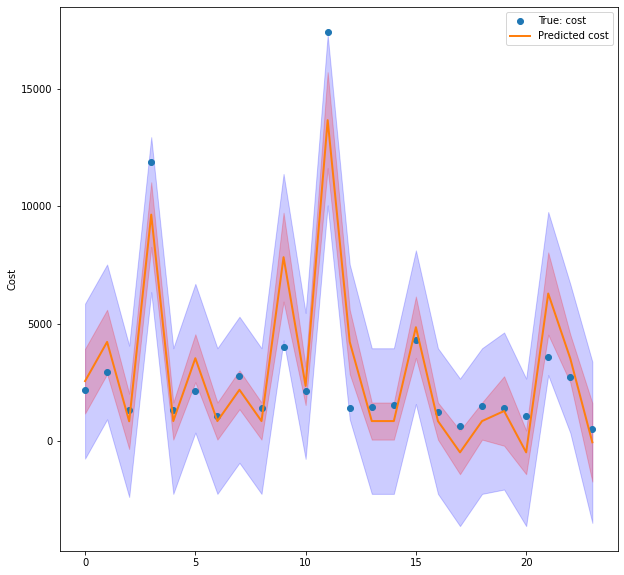

In [134]:
n1 = 24

plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
ax.plot(range(n1), y_train, 'o', label = "True: cost")
ax.plot(range(n1), predicted, '-', lw=2, label = "Predicted cost")

ax.fill_between(np.arange(n1), pred_df['obs_ci_lower'], pred_df['obs_ci_upper'], alpha=0.2, color='blue')
ax.fill_between(np.arange(n1), pred_df['mean_ci_lower'], pred_df['mean_ci_upper'], alpha=0.2, color='red')
ax.legend(loc='best');

ax.set_ylabel('Cost')
plt.savefig('CI_intervals.png')